In [2]:
import pandas as pd


In [3]:

df = pd.read_csv("insurance_data (1).csv")

In [4]:
print(df.head())

   age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None


In [6]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns)


Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')


In [7]:
df = df.drop_duplicates()


In [8]:
print(df.isnull().sum())


age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

C:\Users\pc\AppData\Local\Temp\ipykernel_26408\3446267575.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include='object').columns:


In [11]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [12]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df = df.reset_index(drop=True)

In [15]:
df.to_csv("insurance_data_cleaned.csv", index=False)

print("Cleaning complete ✅")

Cleaning complete ✅


In [17]:
print(df.dtypes)



age           int64
gender          str
bmi         float64
children      int64
smoker          str
region          str
charges     float64
dtype: object


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df.groupby('smoker')['charges'].mean()



smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [21]:
X = df.drop('charges', axis=1)
y = df['charges']


In [22]:
X = pd.get_dummies(X, drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4177.045561036319
R2 Score: 0.8069287081198012


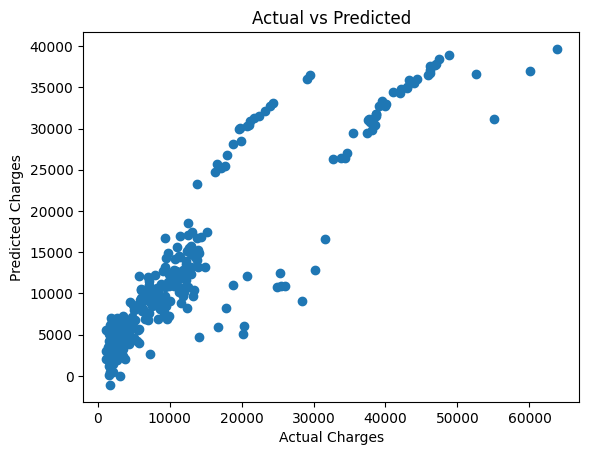

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.show()


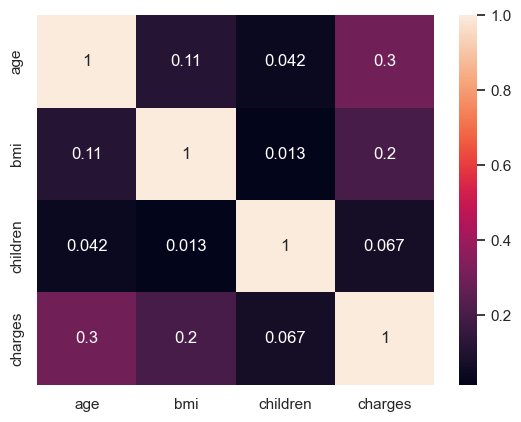

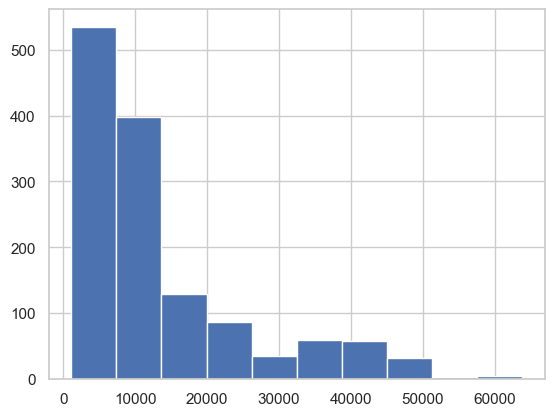

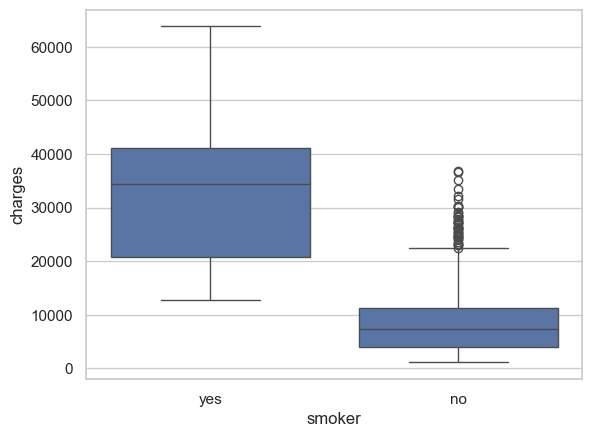

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Heatmap (relation check)
sns.heatmap(df.corr(numeric_only=True), annot=True) # to find out mean i used heatmap to mand data easy to understand & less complex
plt.show()

# 2️⃣ Charges distribution (data spread)
df['charges'].hist()
plt.show()

# 3️⃣ Smoker vs Charges (most important comparison)
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


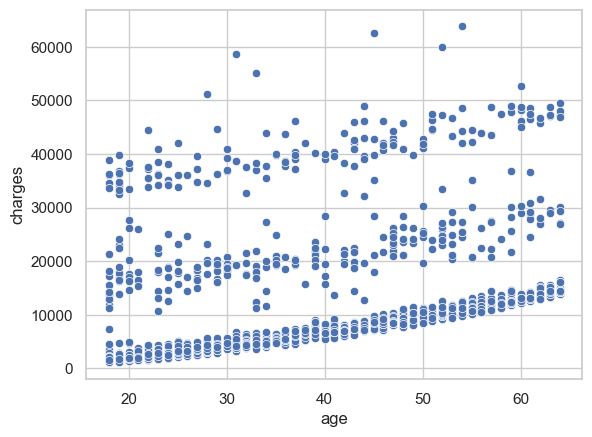

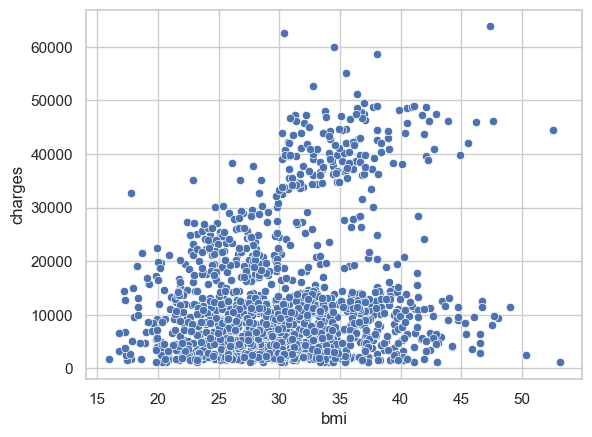

In [30]:
sns.scatterplot(x='age', y='charges', data=df)
plt.show()

sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()


In [31]:
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0,18.5,25,30,100],
                            labels=['Underweight','Normal','Overweight','Obese'])


In [32]:
df['age_group'] = pd.cut(df['age'],
                         bins=[0,20,40,60,100],
                         labels=['Teen','Adult','Middle','Senior'])


In [33]:
df.groupby('smoker')['charges'].mean()
df.groupby('region')['charges'].mean()
df.groupby('bmi_category')['charges'].mean()


bmi_category
Underweight     8657.620652
Normal         10435.440719
Overweight     10997.803881
Obese          15580.700985
Name: charges, dtype: float64

<Axes: >

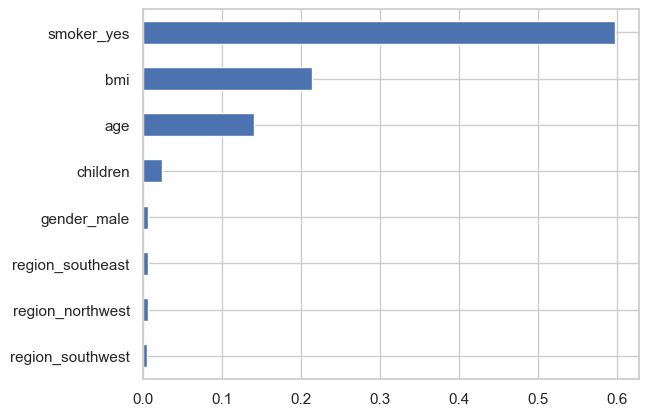

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

import pandas as pd
pd.Series(model.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh')
